# Before Convolutional Neural Network
---

## Real Game : CIFAR-10

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [1]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

### 데이터를 불러옵시다.

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 214s 1us/step


In [3]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
labels = { 0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 1622
다음 그림은 Deer 입니다.


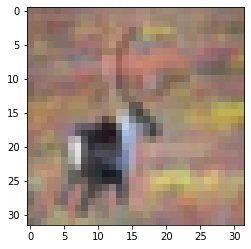

In [9]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format( labels[test_y[id][0]] ))
plt.imshow(test_x[id])
plt.show()

In [10]:
print('max :', train_x.max(),'  min :', train_x.min())

max : 255   min : 0


### 코드를 완성해주세요!

해야 할 일

1. 전처리
    * x, y에 대하여 모두! 단, x에 대하여 reshape를 의도한 것은 아닙니다!

2. 모델링
    * 이미지 데이터를 펼쳐주는 레이어를 사용하세요.
    * 히든 레이어 4개 사용, 각 노드는 512, 512, 256, 128
    * 이 문제는 회귀? 분류?

3. 학습
    * epochs=50, validation_split=0.2, early stopping
    * epoch별 accuracy, loss가 보고 싶다면 history라는 변수에 담아내자!

In [23]:
# 스케일링
min_n = train_x.min()
max_n = train_x.max()
train_x = (train_x-min_n)/(max_n-min_n)
test_x = (test_x-min_n)/(max_n-min_n)
# 원핫인코딩
from tensorflow.keras.utils import to_categorical
y_len = len(np.unique(train_y))
train_y = to_categorical(np.squeeze(train_y), y_len)
test_y = to_categorical(np.squeeze(test_y), y_len)
train_x.shape, train_y.shape

((50000, 32, 32, 3), (50000, 10))

In [24]:
# 모델 구축
from tensorflow.keras.layers import Dense
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(32,32,3)))
model.add(tf.keras.layers.Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,001,546
Trainable params: 2,001,546
Non-

In [25]:
# early stop
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)
# model. fit
history = model.fit(train_x, train_y, validation_split=0.2,
                    verbose=1, epochs=50,
                    callbacks=[es])

Epoch 1/50
1250/1250 [==============================] - 15s 7ms/step - loss: 1.8915 - accuracy: 0.3112 - val_loss: 1.7557 - val_accuracy: 0.3694
Epoch 2/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.7154 - accuracy: 0.3805 - val_loss: 1.7439 - val_accuracy: 0.3723
Epoch 3/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6312 - accuracy: 0.4111 - val_loss: 1.7094 - val_accuracy: 0.3858
Epoch 4/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5693 - accuracy: 0.4369 - val_loss: 1.6022 - val_accuracy: 0.4184
Epoch 5/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5248 - accuracy: 0.4538 - val_loss: 1.5765 - val_accuracy: 0.4368
Epoch 6/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4876 - accuracy: 0.4664 - val_loss: 1.5568 - val_accuracy: 0.4520
Epoch 7/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4541 - accuracy: 0.4800 - val_loss: 1.5347 - val_accuracy

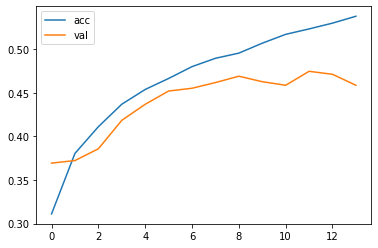

In [26]:
# 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc','val'])
plt.show()



---




---

In [27]:
performance_test = model.evaluate(test_x, test_y)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 203.1285 - accuracy: 0.4107
Test Loss : 203.128540,  Test Accuracy : 41.070%


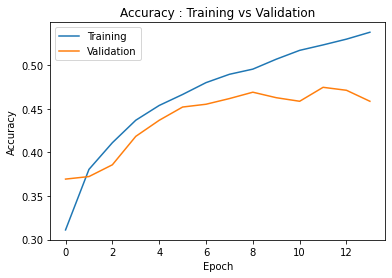

In [28]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

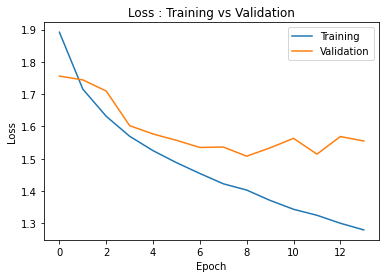

In [29]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [30]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)


print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

313/313 [==============================] - 1s 2ms/step
트레이닝 정확도 : 50.80%
테스트 정확도 : 41.07%


id = 3767
다음 그림은 Frog 입니다.
모델의 예측 : Automobile
모델의 카테고리별 확률 : 
{'Airplane': 0.0, 'Automobile': 100.0, 'Bird': 0.0, 'Cat': 0.0, 'Deer': 0.0, 'Dog': 0.0, 'Frog': 0.0, 'Horse': 0.0, 'Ship': 0.0, 'Truck': 0.0}
틀렸어요


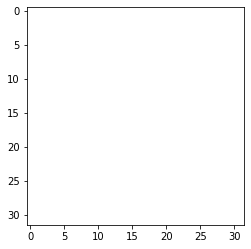

In [32]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format(labels[test_y.argmax(axis=1)[id]] ))
print('모델의 예측 : {}'.format(labels[single_pred_test[id]] ))

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()